In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import eda



Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("ready-to-use-titanic.csv")

In [3]:
del df["Unnamed: 0"]

In [4]:
x = df.drop(columns="Survived")
y= df["Survived"]

In [5]:
xtr,xte,ytr,yte = train_test_split(x,y)

In [6]:
eda.miss.check(x)

Age           0.00
firstclass    0.00
secondclass   0.00
thirdclass    0.00
C             0.00
Q             0.00
S             0.00
female        0.00
male          0.00
dtype: float64

In [7]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=25, random_state=2)
rand_forest.fit(xtr, ytr) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [8]:
from sklearn.metrics import accuracy_score

yhat = rand_forest.predict(xte)

print("Random Forest Accuracy Score: {:.2f}".format(accuracy_score(yte, yhat)))

Random Forest Accuracy Score: 0.77


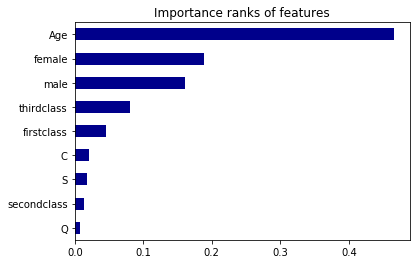

In [9]:
importance_rank = pd.Series(data=rand_forest.feature_importances_,
                        index= xtr.columns)

importance_rank_sorted = importance_rank.sort_values()

importance_rank_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance ranks of features')
plt.show()

In [10]:
x=pd.read_csv("house_features_for_model.csv")

In [11]:
y=pd.read_csv("house_prices_for_model.csv")

In [12]:
xtr,xte,ytr,yte = train_test_split(x,y)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rand_forest_regression = RandomForestRegressor(n_estimators=25, random_state=2)
rand_forest_regression.fit(xtr, ytr) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import mean_squared_error as mse

yhat = rand_forest_regression.predict(xte)
rmse_test = mse(yte, yhat)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 32345.16


In [16]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=111)
decision_tree_reg.fit(xtr, ytr)

yhat = decision_tree_reg.predict(xte)
rmse_test = mse(yte, yhat)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 46389.28


In [17]:
importance_ranks = pd.Series(data=rand_forest_regression.feature_importances_,
                        index=x.columns)

In [18]:
importance_ranks_sorted = importance_ranks.sort_values()

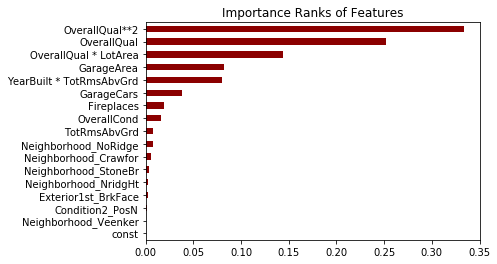

In [19]:
importance_ranks_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Ranks of Features')
plt.show()

# Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameters={"n_estimators":[i for i in range(100,200,20)],
            "criterion": ["mse","mae"],
            "max_depth":[i for i in range(1,5,2)]
           }

grid_cv = GridSearchCV(rand_forest_regression,param_grid=parameters)

grid_cv.fit(x, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [34]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score         : ", grid_cv.best_score_)

Best Parameters :  {'criterion': 'mse', 'max_depth': 3, 'n_estimators': 100}
Best Score         :  0.725865858907006


In [35]:
results = grid_cv.cv_results_
results = pd.DataFrame(results)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.10,0.00,0.01,0.00,mse,1,100,"{'criterion': 'mse', 'max_depth': 1, 'n_estima...",0.43,0.51,0.53,0.44,0.48,0.48,0.04,15
1,0.11,0.00,0.01,0.00,mse,1,120,"{'criterion': 'mse', 'max_depth': 1, 'n_estima...",0.43,0.51,0.53,0.44,0.48,0.48,0.04,12
2,0.13,0.00,0.01,0.00,mse,1,140,"{'criterion': 'mse', 'max_depth': 1, 'n_estima...",0.44,0.51,0.53,0.45,0.48,0.48,0.04,11
3,0.15,0.00,0.01,0.00,mse,1,160,"{'criterion': 'mse', 'max_depth': 1, 'n_estima...",0.43,0.51,0.53,0.44,0.48,0.48,0.04,13
4,0.17,0.00,0.01,0.00,mse,1,180,"{'criterion': 'mse', 'max_depth': 1, 'n_estima...",0.44,0.51,0.53,0.44,0.48,0.48,0.04,14
